# Project#4: Data Scientist Capstone

This project aims to analyze a dataset of medical appointments to understand the factors influencing patient attendance. Using Python libraries such as NumPy, pandas, Matplotlib, and scikit-learn within Anaconda, I employed algorithms and techniques to conduct comprehensive data exploration, visualization, and derive insights from the dataset. The goal was to build predictive models to identify the likelihood of no-shows and determine the most significant factors affecting attendance.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangeda">Data Wrangling and Exploratory Data Analysis</a></li>
<li><a href="#imlement"> Algorithm implementation </a></li>
<li><a href="#result"> Results analysis and conclusion </a></li>
<li><a href="#link"> Medium blog post link </a></li>
</ul>

<a id='intro'></a>

## Introduction

> **Medical Appointment No Shows**: This dataset contains information from 100,000 medical appointments in Brazil. It focuses on whether or not patients attend their appointments, capturing a variety of patient characteristics in each record.

> **Data Content**: The dataset includes 110,527 medical appointments with 14 associated variables, detailing whether patients show up for their appointments.
ages sent to the patient.  <br>


<a id='wrangeda'></a>
**I began by defining the problem of predicting patient no-shows for medical appointments and explored potential solutions. I analyzed the problem using visualizations and data exploration to identify suitable algorithms and features.**

In [198]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [199]:
# Load the dataset
df = pd.read_csv('No-show appointments.csv')

# Display the first few rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [200]:
# Check the shape of the dataset
df.shape

(110527, 14)

In [201]:
# Display information about the dataset, including data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in the dataset. I will correct the data types of the columns, drop unnecessary columns, rename them, and convert categorical variables to binary where applicable.

In [202]:
# Convert 'AppointmentDay' to datetime format and extract day, month, and year
df['AppointmentDay'] = pd.to_datetime(pd.to_datetime(df['AppointmentDay']).dt.date)
df['day'] = df['AppointmentDay'].dt.day
df['month'] = df['AppointmentDay'].dt.month
df['year'] = df['AppointmentDay'].dt.year

In [203]:
# Drop unnecessary columns
columns_to_drop = ['PatientId', 'AppointmentID' , 'ScheduledDay', 'Neighbourhood', 'AppointmentDay' ]
df = df.drop(columns=columns_to_drop)

In [204]:
# Define a function to clean and rename columns
def re_name(col):
    col = col.strip().lower().replace('-','_') # Here will replace this notation - into thei _
    return col
# Rename columns using the defined function
df.rename(columns = lambda x: re_name(x), inplace=True) # This function will re names the columns

In [205]:
# Display the names of columns after renaming
df.columns

Index(['gender', 'age', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no_show', 'day', 'month',
       'year'],
      dtype='object')

In [206]:
# Display value counts of the 'no_show' column
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [207]:
# Convert 'no_show' column values to binary (0 for No-show, 1 for Show)
df.no_show = np.where(df.no_show == "Yes", 1, 0)
# Display updated value counts of the 'no_show' column
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

In [208]:
# Display value counts of the 'gender' column
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [209]:
# Convert 'gender' column values to binary (0 for Male, 1 for Female)
df.gender = np.where(df.gender == "F", 1, 0)
# Display updated value counts of the 'gender' column
df.gender.value_counts()

1    71840
0    38687
Name: gender, dtype: int64

In [210]:
# Display the first few rows of the cleaned dataset
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day,month,year
0,1,62,0,1,0,0,0,0,0,29,4,2016
1,0,56,0,0,0,0,0,0,0,29,4,2016
2,1,62,0,0,0,0,0,0,0,29,4,2016
3,1,8,0,0,0,0,0,0,0,29,4,2016
4,1,56,0,1,1,0,0,0,0,29,4,2016


In [211]:
# Display data types of columns
df.dtypes

gender          int64
age             int64
scholarship     int64
hipertension    int64
diabetes        int64
alcoholism      int64
handcap         int64
sms_received    int64
no_show         int64
day             int64
month           int64
year            int64
dtype: object

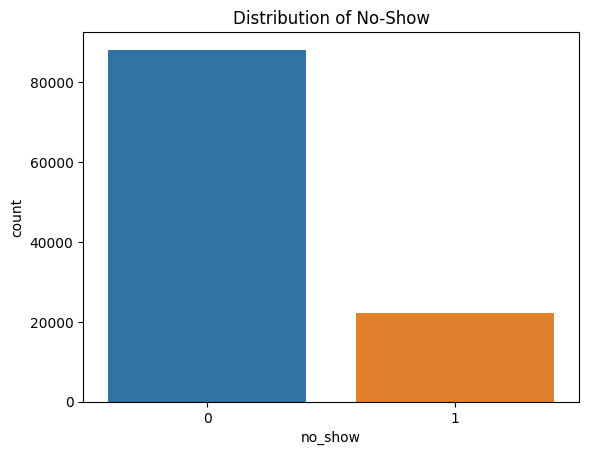

In [212]:
# Plot the distribution of the target variable 'no_show'
sns.countplot(x='no_show', data=df)
plt.title('Distribution of No-Show')
plt.show()

1. High Attendance: Most scheduled events were attended, as indicated by the taller blue bar (0).
2. Low No-Shows: There were significantly fewer no-shows, represented by the shorter orange bar (1).

This indicates a high attendance rate and a low no-show rate.

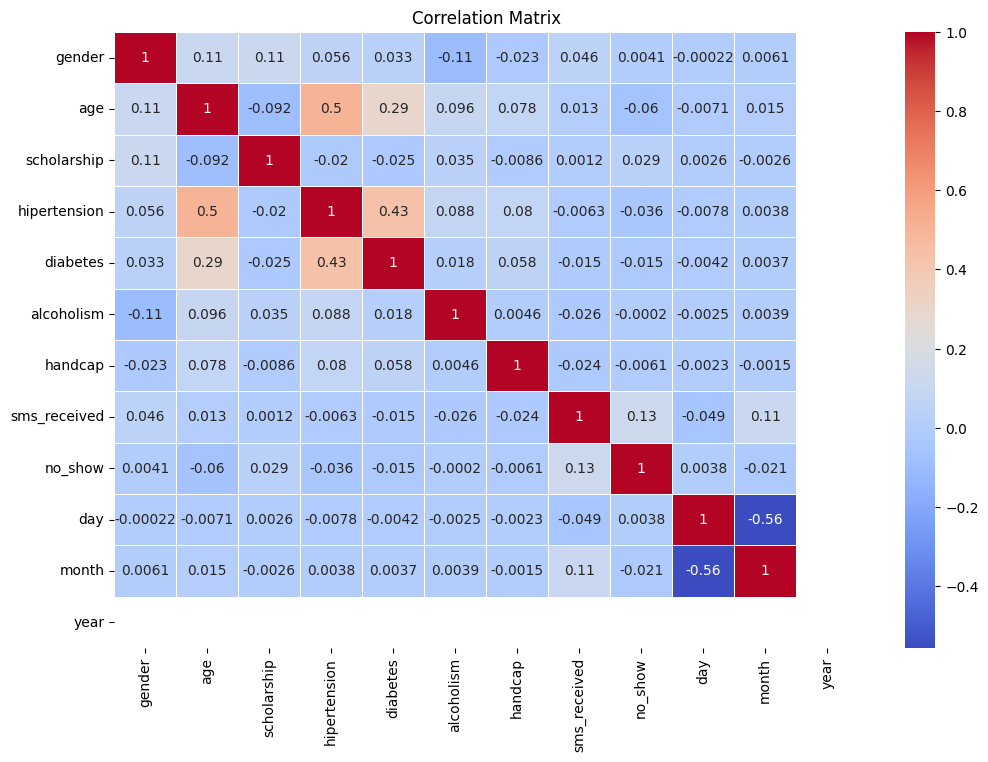

In [213]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. Age and Hypertension: Moderate positive correlation (0.5).
2. Age and Diabetes: Moderate positive correlation (0.29).
3. No-Show: Weak correlations with other features.
4. Day and Month: Strong negative correlation (-0.56).

Most features are weakly correlated with each other.

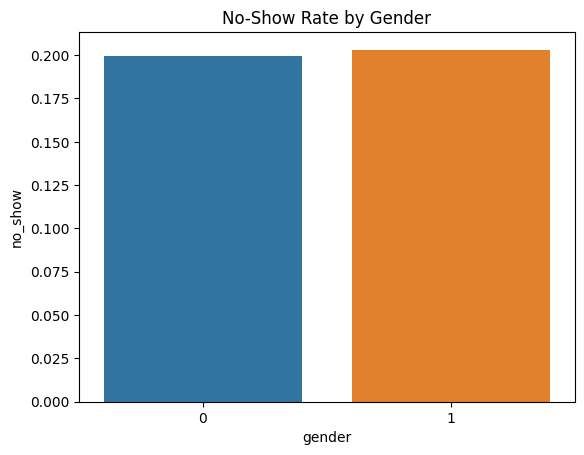

In [214]:
# Plot no-show rate by gender
sns.barplot(x='gender', y='no_show', data=df, ci=None)
plt.title('No-Show Rate by Gender')
plt.show()

1. Similar No-Show Rates: Both genders have similar no-show rates, around 20%.
2. No Significant Gender Difference: The difference in no-show rates between genders (0 for one gender, 1 for the other) is minimal.

This indicates that gender does not significantly affect the likelihood of no-shows.

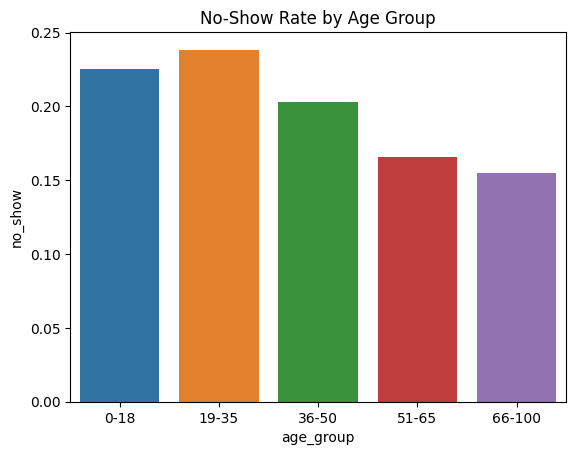

In [215]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])

# Plot no-show rate by age group
sns.barplot(x='age_group', y='no_show', data=df, ci=None)
plt.title('No-Show Rate by Age Group')
plt.show()

1. Highest No-Show Rate: The 19-35 age group has the highest no-show rate, around 22%.
2. High No-Show Rate for Youngest Group: The 0-18 age group also has a relatively high no-show rate, slightly above 20%.
3. Lower No-Show Rates for Older Groups: The 36-50, 51-65, and 66-100 age groups have progressively lower no-show rates, with the 66-100 group having the lowest rate, around 15%.

This indicates that younger individuals (0-35) are more likely to miss appointments compared to older individuals (36+).

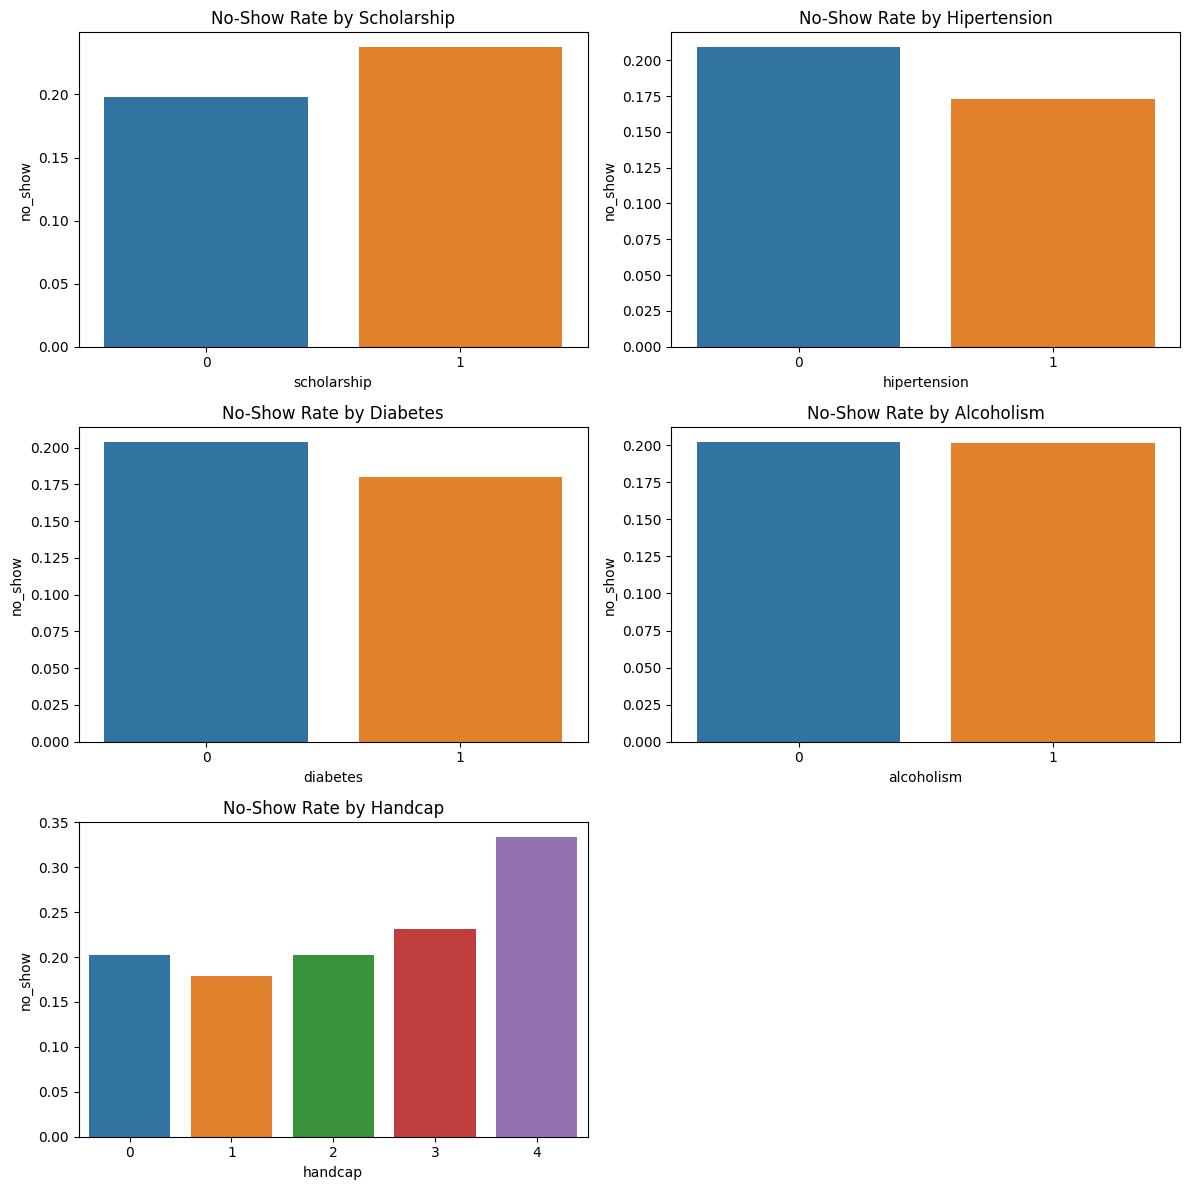

In [216]:
# List of medical conditions
conditions = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap']

# Create subplots with 2 plots per row
fig, axes = plt.subplots(nrows=len(conditions) // 2 + len(conditions) % 2, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each condition
for idx, condition in enumerate(conditions):
    sns.barplot(x=condition, y='no_show', data=df, ci=None, ax=axes[idx])
    axes[idx].set_title(f'No-Show Rate by {condition.capitalize()}')

# Remove any empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Scholarship:
Individuals without a scholarship (0) have a slightly lower no-show rate compared to those with a scholarship (1).

2. Hypertension:
No significant difference in no-show rates between individuals with and without hypertension.

3. Diabetes:
Individuals with diabetes (1) have a slightly lower no-show rate compared to those without diabetes (0).

4. Alcoholism:
No significant difference in no-show rates between individuals with and without alcoholism.

5. Handicap:
The no-show rate increases with the level of handicap, with the highest rate for individuals with a handicap level of 4.

These insights suggest that having a scholarship and a higher handicap level may be associated with higher no-show rates, while diabetes is associated with a slightly lower no-show rate. Hypertension and alcoholism do not appear to significantly affect the no-show rates.

<a id='imlement'></a>
**I implemented the chosen algorithms and metrics, documenting preprocessing, refinement, and post-processing steps.**

In [217]:
# Dropping the 'age_group' column
columns_to_drop = ['age_group']
df = df.drop(columns=columns_to_drop)

In [218]:
# Split the data into features and target variable
X = df.drop(['no_show'], axis=1)
y = df['no_show']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [219]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
# Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [221]:
# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Initialize and train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [222]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("Classification Report:\n", class_report_logreg)

Logistic Regression Accuracy: 0.7999336530052172
Confusion Matrix:
 [[26525     0]
 [ 6634     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     26525
           1       0.00      0.00      0.00      6634

    accuracy                           0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.64      0.80      0.71     33159



/Users/noorh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noorh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noorh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
# Evaluate random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Accuracy: 0.7660363702162308
Confusion Matrix:
 [[24706  1819]
 [ 5939   695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86     26525
           1       0.28      0.10      0.15      6634

    accuracy                           0.77     33159
   macro avg       0.54      0.52      0.51     33159
weighted avg       0.70      0.77      0.72     33159



In [224]:
# Post-processing: feature importance from Random Forest
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print("Feature Importances:\n", feature_importances)

Feature Importances:
          feature  importance
1            age    0.626943
8            day    0.237857
7   sms_received    0.046900
0         gender    0.020397
6        handcap    0.012393
3   hipertension    0.012017
4       diabetes    0.011538
9          month    0.011166
2    scholarship    0.010606
5     alcoholism    0.010183
10          year    0.000000


<a id='result'></a>
**I collected and analyzed the results, visualized significant quantities, validated and justified the findings, and made concluding remarks about whether the implementation adequately solved the problem.**

### Logistic Regression Results:
- Accuracy: 79.99%
- Confusion Matrix: Predicted no positive instances (all no-shows were missed).
### Classification Report:
- Negative class (0): Precision 0.80, Recall 1.00
- Positive class (1): Precision, Recall, F1-score are 0.

### Random Forest Results:
- Accuracy: 76.60%
- Confusion Matrix: Predicted some positive instances.
### Classification Report:
- Negative class (0): Precision 0.81, Recall 0.93
- Positive class (1): Precision 0.28, Recall 0.10

## Visualize Significant Quantities

/Users/noorh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


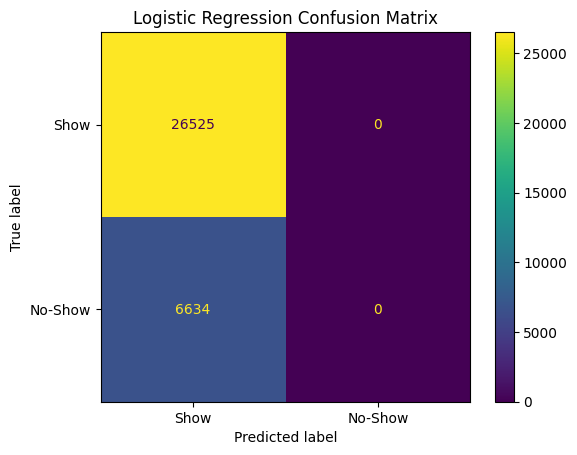

/Users/noorh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


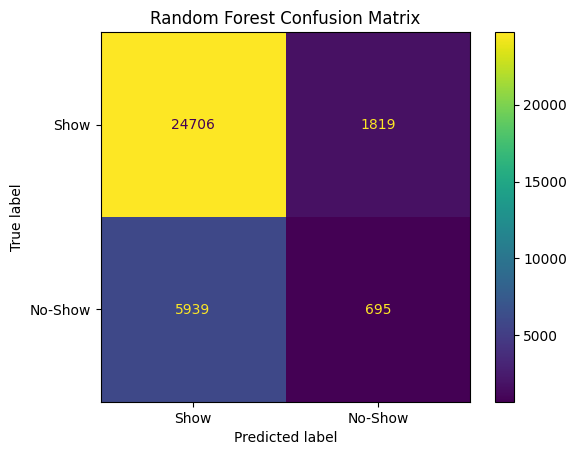

In [225]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['Show', 'No-Show'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion Matrix for Random Forest
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Show', 'No-Show'])
plt.title('Random Forest Confusion Matrix')
plt.show()

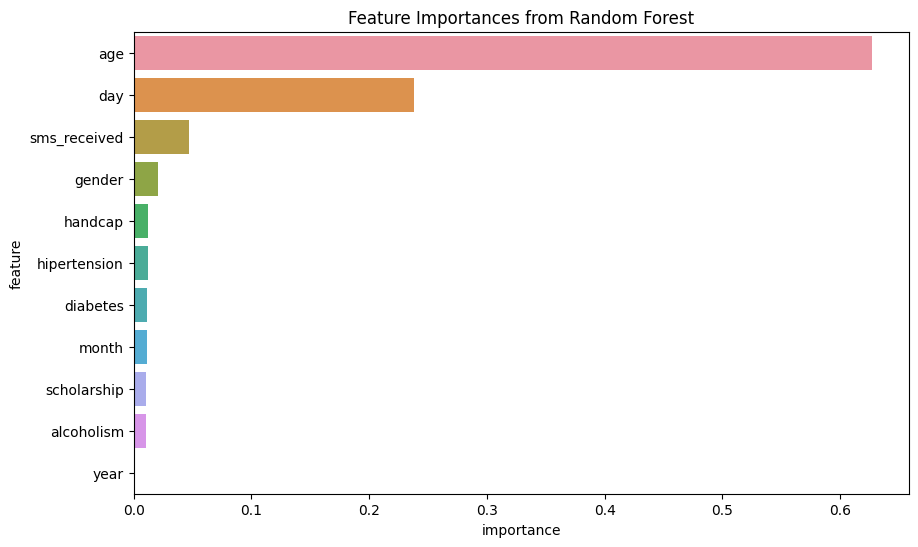

In [226]:
# Plot feature importances for Random Forest
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

## Validate/Justify Results
- Logistic Regression: High accuracy but fails to predict no-shows, indicating a bias towards the majority class.
- Random Forest: Better at predicting no-shows but with low precision and recall for them, suggesting it captures more variance but still needs improvement.

## Summary:
- Logistic Regression struggles with predicting no-shows.
- Random Forest shows promise but needs improvement.
- Age is the most significant predictor of no-shows.
- Further steps include model tuning, exploring alternative models, and potentially adding more features.

## Conclusion
- Adequacy: Both models show limitations in predicting no-shows effectively. Logistic regression is too biased towards the majority class. Random forest performs better but still has low precision and recall for no-shows.
*Recommendations:
** Model Tuning: Consider tuning hyperparameters or using techniques like SMOTE to handle class imbalance.
** Alternative Models: Explore other algorithms like Gradient Boosting, SVM, or neural networks.
** Additional Features: Incorporate more relevant features if available to improve predictive power.


<a id='link'></a>
**Here is the link to the Medium blog post :**
https://medium.com/@nalharbi0373/predicting-medical-appointment-no-shows-a-technical-analysis-b68ad310f8f8